In [8]:
from data import *
path = "Data/TestRecordings"
recs = Recordings(path)

f:\Python\GazeBasedSelection\data.py:26: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  scene_data = pd.read_table(os.path.join(path, condition, "SceneData.tsv"), sep="\t", decimal=",")


In [15]:
len(recs)

3

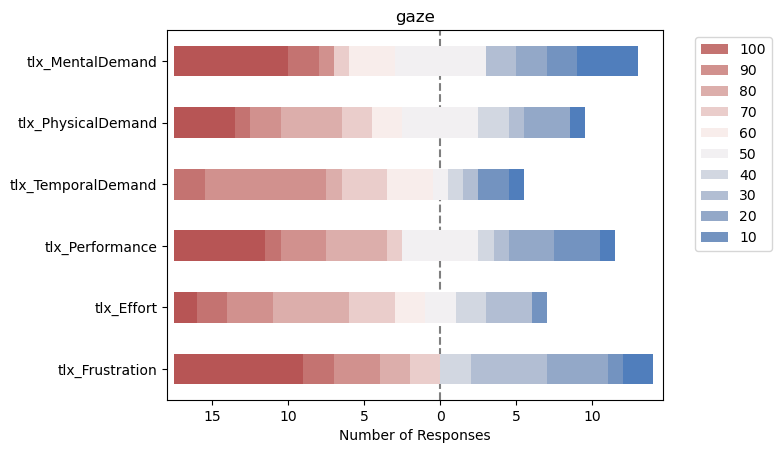

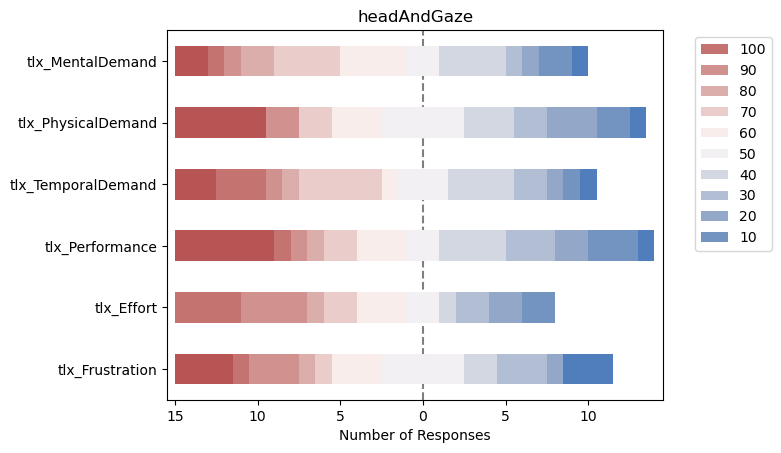

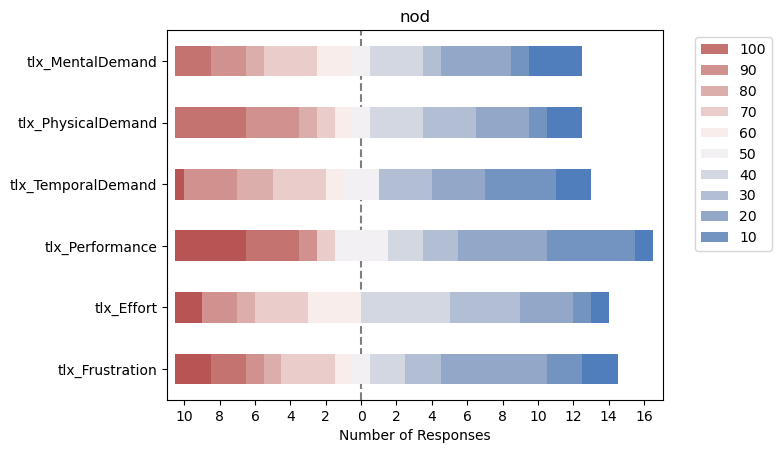

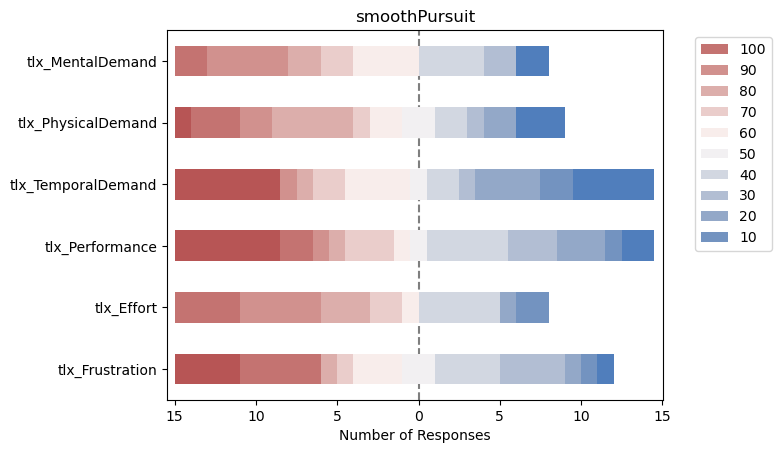

In [9]:
from plot_likert import plot_likert
import matplotlib.pyplot as plt
import seaborn as sns
for condition in Recording.conditions:
    answers = recs.get_answers(condition, simulate_answers=True)
    plot_likert(answers, [x*10 for x in range(11)][::-1], colors=sns.color_palette("vlag_r", 12))
    plt.title(condition)
    plt.show()

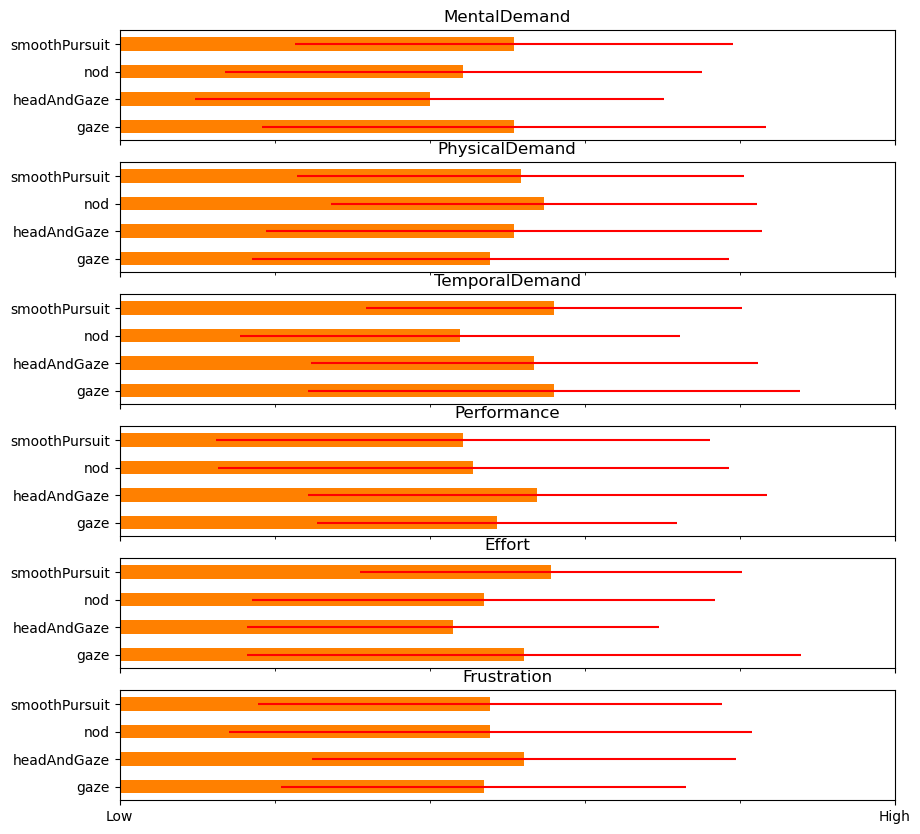

In [10]:
import numpy as np
import pandas as pd
import utils
answers = recs.get_all_answers(simulate_answers=True)
summary = dict()
for cond in answers:
    summary[cond] = dict()
    summary[f"{cond}_std"] = dict()
    for q in answers[cond]:
        summary[cond][q] = np.mean(answers[cond][q])
        summary[f"{cond}_std"][q] = np.std(answers[cond][q])
summary = pd.DataFrame(summary)
_, axs = plt.subplots(len(summary), sharex=True, sharey=True, figsize=(10,10))
i = 0

# start_color = np.array([8, 171, 29]) / 255
# end_color = np.array([179, 19, 19]) / 255
# grad_color = end_color - start_color
# color_scaling = lambda x: 1 / (1 + (x / (1-x))**(-2))


for question, row in summary.iterrows():
    row[Recording.conditions].plot(
        kind="barh",
        title=question.replace("tlx_", ""),
        # xerr=row[[f"{x}_std" for x in Recording.conditions]],
        # color=[start_color + color_scaling(x/100) * grad_color for x in row[Recording.conditions]],
        color = [utils.get_color(x) for x in row[Recording.conditions]],
        ax=axs[i]
    )
    axs[i].errorbar(
        row[Recording.conditions], 
        Recording.conditions,
        xerr=row[[f"{x}_std" for x in Recording.conditions]],
        color="red",
        ls="none")
    axs[i].set_xticks([0, 100], ["Low", "High"])
    i+=1
plt.show()

In [11]:
recs.get_answers("nod")

,tlx_MentalDemand,tlx_PhysicalDemand,tlx_TemporalDemand,tlx_Performance,tlx_Effort,tlx_Frustration
ALena,40,70,50,20,30,10
TEST_471,0,30,0,10,20,0
Triss1,20,40,30,20,40,20


In [12]:
recs.calc_events()

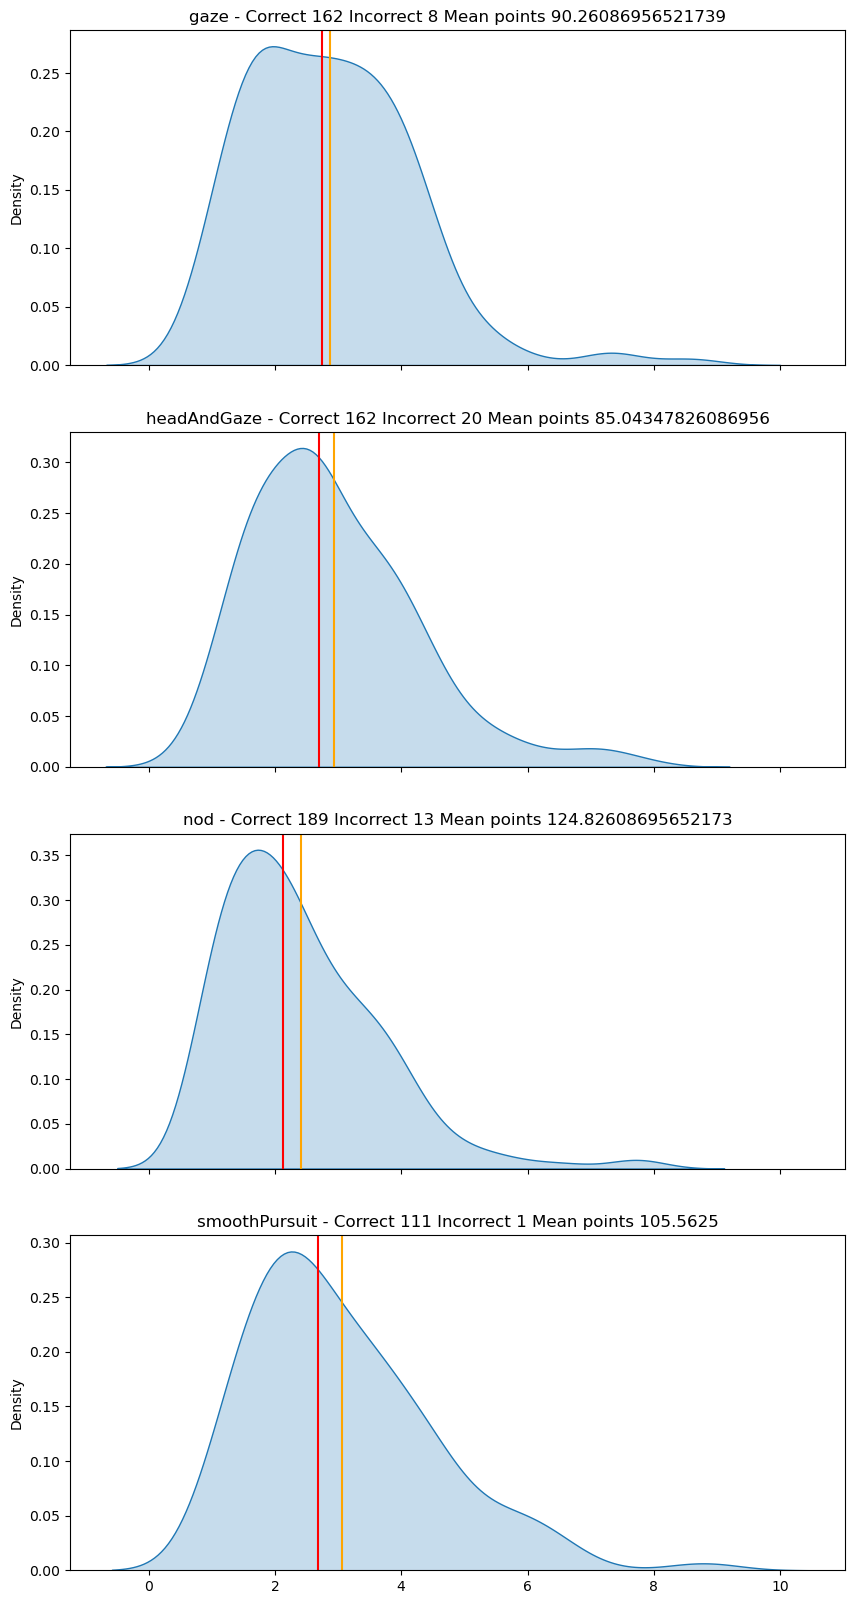

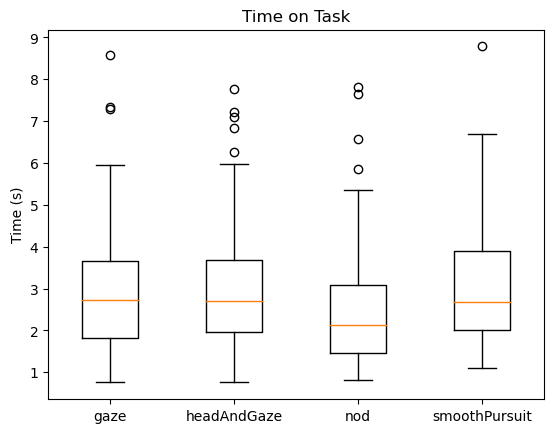

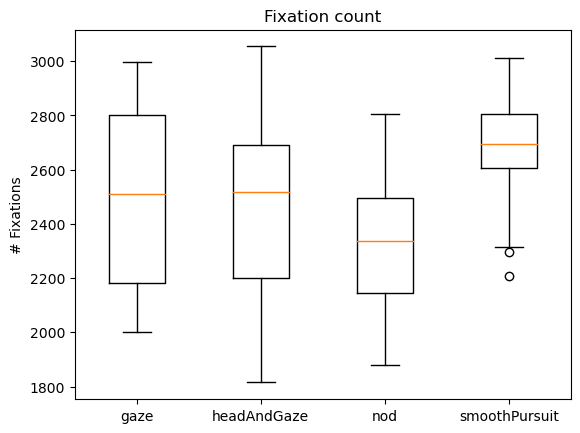

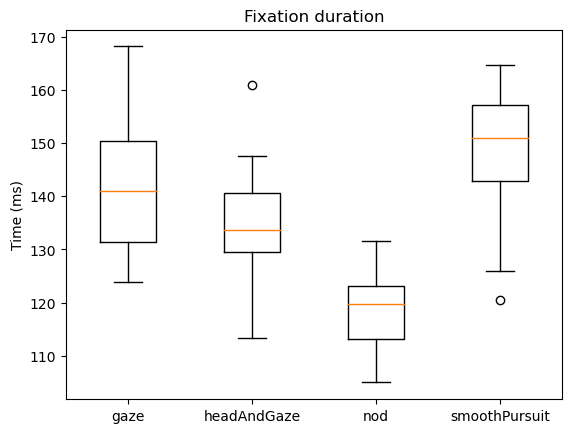

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(len(Recording.conditions), sharex=True, figsize=(10,20))
all_time_on_tasks = dict()
all_fixation_count = dict()
all_fixation_duration = dict()
for i, condition in enumerate(Recording.conditions):
    round_results = recs.get_summarized_rounds(condition)
    time_on_task = list()
    correct = 0
    incorrect = 0
    points = list()
    fixation_count = list()
    fixation_duration = list()
    for player in round_results:
        for round in round_results[player]:
            res = round_results[player][round]
            time_on_task += res["TimeOnTask"]
            correct += res["Correct"]
            incorrect += res["Incorrect"]
            points.append(res["Points"])
            fixation_count.append(res["FixationCount"])
            fixation_duration.append(res["MeanFixationDuration"])
    sns.kdeplot(time_on_task, fill=True, ax=axs[i])
    axs[i].axvline(np.mean(time_on_task), 0, 1, color="orange")
    axs[i].axvline(np.median(time_on_task), 0, 1, color="red")
    axs[i].set_title(f"{condition} - Correct {correct} Incorrect {incorrect} Mean points {np.mean(points)}")
    all_time_on_tasks[condition] = time_on_task
    all_fixation_count[condition] = fixation_count
    all_fixation_duration[condition] = fixation_duration
plt.show()

def create_boxplot(d, title, ylabel):
    _, ax = plt.subplots()
    ax.boxplot(d.values())
    ax.set_xticklabels(d.keys())
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.show()

create_boxplot(all_time_on_tasks, "Time on Task", "Time (s)")
create_boxplot(all_fixation_count, "Fixation count", "# Fixations")
create_boxplot(all_fixation_duration, "Fixation duration", "Time (ms)")

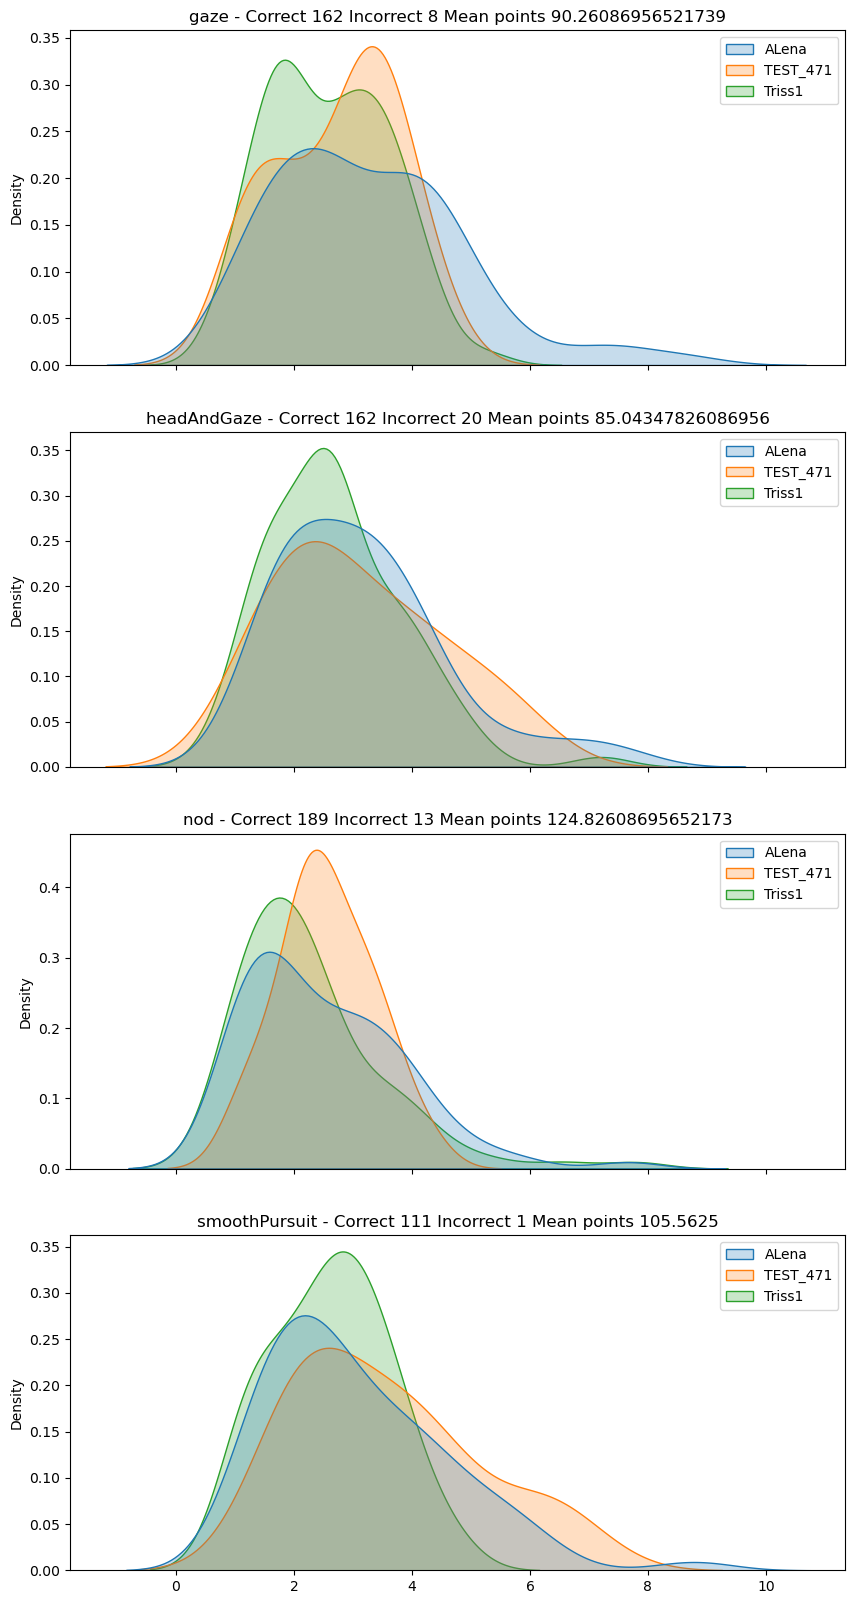

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(len(Recording.conditions), sharex=True, figsize=(10,20))
for i, condition in enumerate(Recording.conditions):
    round_results = recs.get_summarized_rounds(condition)
    time_on_task = dict()
    correct = 0
    incorrect = 0
    points = list()
    for player in round_results:
        time_on_task[player] = list()
        for round in round_results[player]:
            res = round_results[player][round]
            time_on_task[player] += res["TimeOnTask"]
            correct += res["Correct"]
            incorrect += res["Incorrect"]
            points.append(res["Points"])
    sns.kdeplot(time_on_task, fill=True, ax=axs[i], multiple="layer", common_norm=False)
    # axs[i].axvline(np.mean(time_on_task), 0, 1, color="orange")
    # axs[i].axvline(np.median(time_on_task), 0, 1, color="red")
    axs[i].set_title(f"{condition} - Correct {correct} Incorrect {incorrect} Mean points {np.mean(points)}")
plt.show()